In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
file_path = "https://drive.google.com/uc?id=1Zx3NpWd_3vxft8MF1pqk_98sekj2olAL"




In [ ]:
import pandas as pd

# Άμεσος σύνδεσμος λήψης
file_path = "https://drive.google.com/uc?id=1Zx3NpWd_3vxft8MF1pqk_98sekj2olAL"

# Φόρτωση του dataset
df = pd.read_csv(file_path)

# Επιλέγουμε τυχαία 3,000 εγγραφές
subset = df.sample(n=4000, random_state=42)

# Αποθήκευση του μικρότερου dataset σε νέο αρχείο CSV
subset.to_csv('subset_dataset.csv', index=False)

# Λήψη του αρχείου στον τοπικό υπολογιστή
#from google.colab import files
#files.download('/content/subset_dataset.csv')

print("Επιλέχθηκαν τυχαία 3,000 εγγραφές και αποθηκεύτηκαν στο subset_dataset.csv")


# Έλεγχος των πρώτων γραμμών
print(subset.head())
print("\n")

# Πληροφορίες για τύπους δεδομένων και κενές τιμές
print(subset.info())
print("\n")

# Στατιστικά περιγραφικά
print(subset.describe())

Επιλέχθηκαν τυχαία 3,000 εγγραφές και αποθηκεύτηκαν στο subset_dataset.csv
      invoice_no customer_id  gender  age         category  quantity    price  \
65475    I704758     C971218  Female   56  Food & Beverage         4    20.92   
96548    I218404     C949846    Male   22  Food & Beverage         5    26.15   
33949    I195516     C440398  Female   53  Food & Beverage         4    20.92   
58198    I833735     C113971  Female   65  Food & Beverage         5    26.15   
71781    I144592     C529879  Female   51            Shoes         4  2400.68   

      payment_method invoice_date shopping_mall  
65475           Cash   14/05/2021        Kanyon  
96548           Cash     9/9/2022     Metrocity  
33949     Debit Card     1/4/2021        Kanyon  
58198    Credit Card     3/8/2022   Cevahir AVM  
71781    Credit Card   15/04/2021  Metropol AVM  


<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 65475 to 65706
Data columns (total 10 columns):
 #   Column          Non-Null

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding για το φύλο, Female: 0, Male: 1
encoder = LabelEncoder()
subset['gender'] = encoder.fit_transform(subset['gender'])

# One-Hot Encoding για κατηγορικές στήλες
subset = pd.get_dummies(subset, columns=['category', 'payment_method', 'shopping_mall'], drop_first=True)

In [ ]:
# Έλεγχος για ελλείπουσες τιμές
print("Ελλείπουσες τιμές ανά στήλη:\n", subset.isnull().sum())

# Αντικατάσταση ελλείπουσων τιμών για αριθμητικές στήλες με τη μέση τιμή
numeric_columns = subset.select_dtypes(include=["float64", "int64"]).columns
for column in numeric_columns:
    subset[column].fillna(subset[column].mean(), inplace=True)

# Αντικατάσταση ελλείπουσων τιμών για μη αριθμητικές στήλες με τη δημοφιλέστερη τιμή (mode)
categorical_columns = ['gender', 'category', 'payment_method', 'shopping_mall']
for column in categorical_columns:
    if column in subset.columns:  # Ελέγχει αν υπάρχει η στήλη στο dataset
        subset[column].fillna(subset[column].mode()[0], inplace=True)

# Έλεγχος ξανά για ελλείπουσες τιμές
print("Μετά την αντικατάσταση, ελλείπουσες τιμές:\n", subset.isnull().sum())


Ελλείπουσες τιμές ανά στήλη:
 invoice_no                         0
customer_id                        0
gender                             0
age                                0
quantity                           0
price                              0
invoice_date                       0
category_Clothing                  0
category_Cosmetics                 0
category_Food & Beverage           0
category_Shoes                     0
category_Souvenir                  0
category_Technology                0
category_Toys                      0
payment_method_Credit Card         0
payment_method_Debit Card          0
shopping_mall_Emaar Square Mall    0
shopping_mall_Forum Istanbul       0
shopping_mall_Istinye Park         0
shopping_mall_Kanyon               0
shopping_mall_Mall of Istanbul     0
shopping_mall_Metrocity            0
shopping_mall_Metropol AVM         0
shopping_mall_Viaport Outlet       0
shopping_mall_Zorlu Center         0
dtype: int64
Μετά την αντικατάσταση, ελλείπου

<ipython-input-144-068ade526726>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  subset[column].fillna(subset[column].mean(), inplace=True)
<ipython-input-144-068ade526726>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Αντιγραφή του DataFrame για αλλαγές
data = subset.copy()

# Χαρακτηριστικά προς κανονικοποίηση
columns_to_minmaxscale = ['quantity', 'age']
columns_to_standardscale = ['price']

# 1. Αφαίρεση χαρακτηριστικών χωρίς πληροφορία
if 'high_value_ratio' in data.columns:
    data.drop(columns=['high_value_ratio'], inplace=True)

# 2. Εφαρμογή MinMaxScaler
minmax_scaler = MinMaxScaler()
data[columns_to_minmaxscale] = minmax_scaler.fit_transform(data[columns_to_minmaxscale])

# 3. Εφαρμογή StandardScaler
standard_scaler = StandardScaler()
data[columns_to_standardscale] = standard_scaler.fit_transform(data[columns_to_standardscale])

# 4. Έλεγχος κανονικοποίησης
print("Πρώτες γραμμές των δεδομένων μετά την κανονικοποίηση:")
print(data.head())

# 5. Αποθήκευση ανανεωμένων δεδομένων
data.to_csv('processed_data.csv', index=False)
print("Τα ανανεωμένα δεδομένα αποθηκεύτηκαν ως 'processed_data.csv'.")


Πρώτες γραμμές των δεδομένων μετά την κανονικοποίηση:
      invoice_no customer_id  gender       age  quantity     price  \
65475    I704758     C971218       0  0.745098      0.75 -0.701339   
96548    I218404     C949846       1  0.078431      1.00 -0.695910   
33949    I195516     C440398       0  0.686275      0.75 -0.701339   
58198    I833735     C113971       0  0.921569      1.00 -0.695910   
71781    I144592     C529879       0  0.647059      0.75  1.768858   

      invoice_date  category_Clothing  category_Cosmetics  \
65475   14/05/2021              False               False   
96548     9/9/2022              False               False   
33949     1/4/2021              False               False   
58198     3/8/2022              False               False   
71781   15/04/2021              False               False   

       category_Food & Beverage  ...  payment_method_Debit Card  \
65475                      True  ...                      False   
96548                   

In [ ]:
# Αφαίρεση ακραίων τιμών για αριθμητικές στήλες
for column in numeric_columns:
    Q1 = subset[column].quantile(0.25)
    Q3 = subset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    subset = subset[(subset[column] >= lower_bound) & (subset[column] <= upper_bound)]

print("Μετά την αφαίρεση ακραίων τιμών, σχήμα dataset:\n", subset.shape)


Μετά την αφαίρεση ακραίων τιμών, σχήμα dataset:
 (3787, 25)


In [ ]:
import numpy as np
import pandas as pd

# Λειτουργία για την τυχαία αφαίρεση 20% των δεδομένων
def get_random_subset(subset, fraction=0.2, random_state=None):
    """
    Αφαιρεί τυχαία το fraction (π.χ. 20%) των δεδομένων και επιστρέφει το υπόλοιπο.

    Args:
        subset (pd.DataFrame): Το πλήρες dataset.
        fraction (float): Το ποσοστό των δεδομένων που θα αφαιρεθεί (default 0.2).
        random_state (int or None): Ο seed για αναπαραγωγιμότητα (προαιρετικό).

    Returns:
        pd.DataFrame: Το υπόλοιπο dataset μετά την αφαίρεση.
    """
    if random_state is not None:
        np.random.seed(random_state)

    # Υπολογισμός του πλήθους για αφαίρεση
    num_to_remove = int(len(subset) * fraction)

    # Τυχαία επιλογή δεικτών για αφαίρεση (χρησιμοποιούμε το index του DataFrame)
    indices_to_remove = np.random.choice(subset.index, size=num_to_remove, replace=False)

    # Επιστροφή του υπολοίπου 80% δεδομένων
    return subset.drop(indices_to_remove)

# Εφαρμόζουμε την τυχαία αφαίρεση για το 20%
remaining_data = get_random_subset(subset, fraction=0.2, random_state=42)

print(f"Αρχικό πλήθος δεδομένων: {len(subset)}")
print(f"Πλήθος δεδομένων μετά την αφαίρεση: {len(remaining_data)}")

# Εμφάνιση των πρώτων 5 γραμμών του DataFrame
print(remaining_data.head())


Αρχικό πλήθος δεδομένων: 3787
Πλήθος δεδομένων μετά την αφαίρεση: 3030
      invoice_no customer_id  gender  age  quantity    price invoice_date  \
96548    I218404     C949846       1   22         5    26.15     9/9/2022   
33949    I195516     C440398       0   53         4    20.92     1/4/2021   
58198    I833735     C113971       0   65         5    26.15     3/8/2022   
71781    I144592     C529879       0   51         4  2400.68   15/04/2021   
73343    I104653     C209092       1   62         5   179.20   19/11/2022   

       category_Clothing  category_Cosmetics  category_Food & Beverage  ...  \
96548              False               False                      True  ...   
33949              False               False                      True  ...   
58198              False               False                      True  ...   
71781              False               False                     False  ...   
73343              False               False                     False 

In [ ]:
import pandas as pd
import numpy as np

# Υποθέτουμε ότι το 'remaining_data' περιέχει ήδη τις απαραίτητες στήλες.

# 1. Μέση Τιμή Συναλλαγής
if 'total_amount' in remaining_data.columns and 'num_transactions' in remaining_data.columns:
    remaining_data['avg_transaction_value'] = remaining_data['total_amount'] / remaining_data['num_transactions']
else:
    print("Στήλες 'total_amount' και 'num_transactions' λείπουν από το dataset.")

# 2. Συχνότητα Αγοράς
if 'customer_id' in remaining_data.columns and 'date' in remaining_data.columns:
    remaining_data['date'] = pd.to_datetime(remaining_data['date'])  # Βεβαιωνόμαστε ότι η στήλη 'date' είναι datetime
    remaining_data['purchase_frequency'] = remaining_data.groupby('customer_id')['date'].diff().dt.days
else:
    print("Στήλες 'customer_id' και 'date' λείπουν από το dataset.")

# 3. Ημέρες από την Τελευταία Αγορά
if 'date' in remaining_data.columns:
    max_date = remaining_data['date'].max()
    remaining_data['recency'] = (max_date - remaining_data['date']).dt.days
else:
    print("Στήλη 'date' λείπει από το dataset.")

# 4. Ποικιλία Κατηγοριών Προϊόντων
if 'customer_id' in remaining_data.columns and 'category' in remaining_data.columns:
    remaining_data['product_variety'] = remaining_data.groupby('customer_id')['category'].transform('nunique')
else:
    print("Στήλες 'customer_id' και 'category' λείπουν από το dataset.")

# 5. Ποσοστό Ακριβών Προϊόντων
if 'price' in remaining_data.columns:
    threshold = 100  # Μπορείς να αλλάξεις το κατώφλι ανάλογα με την περίπτωσή σου
    remaining_data['high_value_ratio'] = remaining_data['price'] > threshold
    remaining_data['high_value_ratio'] = remaining_data.groupby('customer_id')['high_value_ratio'].transform('mean')
else:
    print("Στήλη 'price' λείπει από το dataset.")

# 6. Εποχικά Χαρακτηριστικά
if 'date' in remaining_data.columns:
    remaining_data['month'] = remaining_data['date'].dt.month
    remaining_data['day_of_week'] = remaining_data['date'].dt.dayofweek
else:
    print("Στήλη 'date' λείπει από το dataset.")

# 7. Προτίμηση Εμπορικού Κέντρου
if 'customer_id' in remaining_data.columns and 'shopping_mall' in remaining_data.columns:
    remaining_data['preferred_mall_ratio'] = remaining_data.groupby('customer_id')['shopping_mall'].transform(
        lambda x: x.value_counts(normalize=True).max()
    )
else:
    print("Στήλες 'customer_id' και 'shopping_mall' λείπουν από το dataset.")

# Έλεγχος του ανανεωμένου dataset
print("Πρώτες γραμμές του dataset μετά την προσθήκη χαρακτηριστικών:\n", remaining_data.head())

# Αποθήκευση του ανανεωμένου dataset για μελλοντική χρήση
remaining_data.to_csv('enhanced_dataset.csv', index=False)
print("Το ανανεωμένο dataset αποθηκεύτηκε ως 'enhanced_dataset.csv'.")


Στήλες 'total_amount' και 'num_transactions' λείπουν από το dataset.
Στήλες 'customer_id' και 'date' λείπουν από το dataset.
Στήλη 'date' λείπει από το dataset.
Στήλες 'customer_id' και 'category' λείπουν από το dataset.
Στήλη 'date' λείπει από το dataset.
Στήλες 'customer_id' και 'shopping_mall' λείπουν από το dataset.
Πρώτες γραμμές του dataset μετά την προσθήκη χαρακτηριστικών:
       invoice_no customer_id  gender  age  quantity    price invoice_date  \
96548    I218404     C949846       1   22         5    26.15     9/9/2022   
33949    I195516     C440398       0   53         4    20.92     1/4/2021   
58198    I833735     C113971       0   65         5    26.15     3/8/2022   
71781    I144592     C529879       0   51         4  2400.68   15/04/2021   
73343    I104653     C209092       1   62         5   179.20   19/11/2022   

       category_Clothing  category_Cosmetics  category_Food & Beverage  ...  \
96548              False               False                      True  .

     k          WCSS  Silhouette Score  Calinski-Harabasz Index  \
0    2  2.367168e+08          0.745312             11225.527860   
1    3  1.114906e+08          0.729844             13613.048019   
2    4  5.339530e+07          0.746958             20040.753945   
3    5  3.512076e+07          0.735402             23237.434895   
4    6  2.264825e+07          0.673541             29151.071352   
5    7  1.163866e+07          0.727413             47733.085428   
6    8  7.149202e+06          0.744465             66855.773736   
7    9  4.287615e+06          0.761343             97761.105432   
8   10  2.449198e+06          0.770400            152328.242145   
9   11  1.799377e+06          0.773925            186652.826089   
10  12  1.197978e+06          0.722002            254921.215697   
11  13  9.624003e+05          0.689200            290842.943409   
12  14  8.169906e+05          0.655893            316308.569052   
13  15  7.298970e+05          0.648288            328748.23995

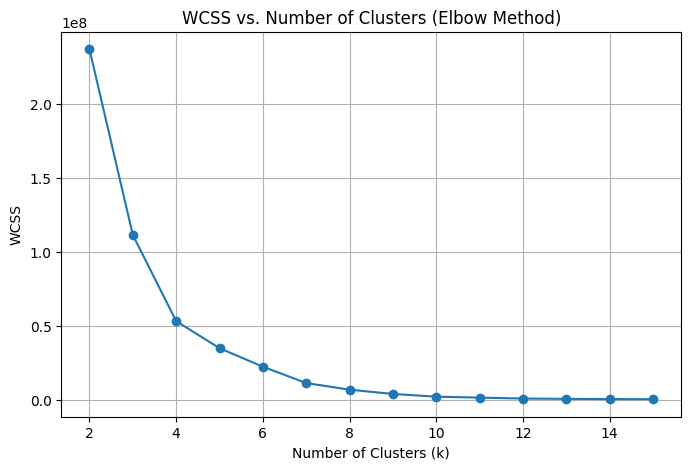


Βέλτιστος αριθμός clusters: 11

Μετρικές για τον βέλτιστο αριθμό clusters:
Silhouette Score: 0.7739
Calinski-Harabasz Index: 186652.8261
Davies-Bouldin Index: 0.2024


KeyError: 'Feature1'

<Figure size 800x600 with 0 Axes>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os

# --- Δημιουργία δεδομένων ---
data, labels_true = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)
numeric_data = remaining_data.select_dtypes(include=["float64", "int64"])

# --- Εύρεση του βέλτιστου αριθμού clusters ---
k_values = range(2, 16)
metrics = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(numeric_data)
    wcss = kmeans.inertia_
    silhouette = silhouette_score(numeric_data, labels)
    calinski_harabasz = calinski_harabasz_score(numeric_data, labels)
    davies_bouldin = davies_bouldin_score(numeric_data, labels)
    metrics.append({"k": k, "WCSS": wcss, "Silhouette Score": silhouette, "Calinski-Harabasz Index": calinski_harabasz, "Davies-Bouldin Index": davies_bouldin})

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# --- Αποθήκευση των μετρικών σε αρχείο Excel ---
output_file = "clustering_metrics.xlsx"
if os.path.exists(output_file):
    # Αν το αρχείο υπάρχει, φόρτωσε το και προσάρτησε τα νέα δεδομένα
    existing_data = pd.read_excel(output_file)
    combined_data = pd.concat([existing_data, metrics_df], ignore_index=True)
    combined_data.to_excel(output_file, index=False)
else:
    # Αν το αρχείο δεν υπάρχει, δημιούργησε το
    metrics_df.to_excel(output_file, index=False)

print(f"Τα αποτελέσματα αποθηκεύτηκαν στο αρχείο: {output_file}")

# --- Οπτικοποίηση του WCSS (Elbow Method) ---
plt.figure(figsize=(8, 5))
plt.plot(metrics_df["k"], metrics_df["WCSS"], marker='o')
plt.title("WCSS vs. Number of Clusters (Elbow Method)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

best_k = metrics_df.loc[metrics_df['Silhouette Score'].idxmax(), 'k']
print(f"\nΒέλτιστος αριθμός clusters: {best_k}")

# --- Εφαρμογή K-Means με τον καλύτερο αριθμό clusters ---
kmeans = KMeans(n_clusters=int(best_k), random_state=42, n_init=10)
final_labels = kmeans.fit_predict(numeric_data)

silhouette = silhouette_score(numeric_data, final_labels)
calinski_harabasz = calinski_harabasz_score(numeric_data, final_labels)
davies_bouldin = davies_bouldin_score(numeric_data, final_labels)

print("\nΜετρικές για τον βέλτιστο αριθμό clusters:")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")

# --- Οπτικοποιήσεις ---
# Scatter Plot (αρχικά χαρακτηριστικά)
plt.figure(figsize=(8, 6))
plt.scatter(numeric_data["Feature1"], numeric_data["Feature2"], c=final_labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title(f"Scatter Plot of Clusters (k={best_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()

# PCA Visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(numeric_data)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=final_labels, cmap='viridis', alpha=0.7)
plt.title(f"PCA Visualization of Clusters (k={best_k})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_data = tsne.fit_transform(numeric_data)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=final_labels, cmap='viridis', alpha=0.7)
plt.title(f"t-SNE Visualization of Clusters (k={best_k})")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()

# Silhouette Plot
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(numeric_data, final_labels)
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(int(best_k)):
    cluster_silhouette_vals = silhouette_vals[final_labels == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower = y_upper + 10
plt.axvline(x=silhouette, color="red", linestyle="--")
plt.title("Silhouette Plot")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.yticks([])
plt.grid(True)
plt.show()

# Heatmap of Cluster Centroids
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=["Feature1", "Feature2"])
plt.figure(figsize=(8, 6))
sns.heatmap(centroids_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Cluster Centroids")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.show()

# Pairwise Feature Plots
sns.pairplot(numeric_data.assign(Cluster=final_labels), hue="Cluster", palette="viridis")
plt.suptitle("Pairwise Feature Plots", y=1.02)
plt.show()

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 1], c=final_labels, cmap='viridis', alpha=0.7)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
ax.set_title(f"3D Scatter Plot of Clusters (k={best_k})")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 2")
plt.legend()
plt.show()


     k          WCSS  Silhouette Score  Calinski-Harabasz Index  \
0    2  2.367168e+08          0.745312             11225.527860   
1    3  1.114906e+08          0.729844             13613.048019   
2    4  5.339530e+07          0.746958             20040.753945   
3    5  3.512076e+07          0.735402             23237.434895   
4    6  2.264825e+07          0.673541             29151.071352   
5    7  1.163866e+07          0.727413             47733.085428   
6    8  7.149202e+06          0.744465             66855.773736   
7    9  4.287615e+06          0.761343             97761.105432   
8   10  2.449198e+06          0.770400            152328.242145   
9   11  1.799377e+06          0.773925            186652.826089   
10  12  1.197978e+06          0.722002            254921.215697   
11  13  9.624003e+05          0.689200            290842.943409   
12  14  8.169906e+05          0.655893            316308.569052   
13  15  7.298970e+05          0.648288            328748.23995

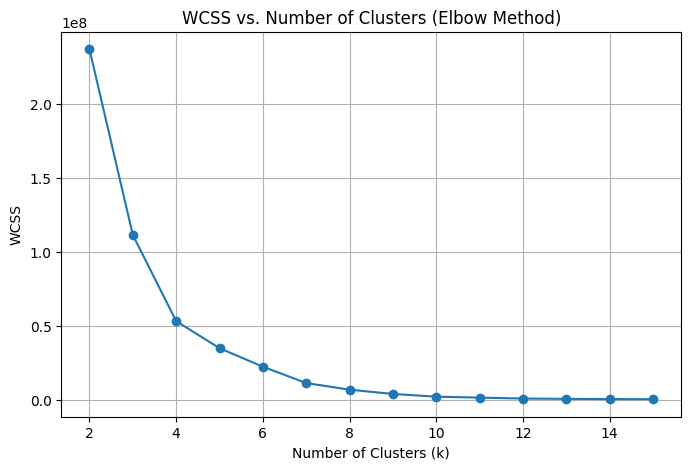


Βέλτιστος αριθμός clusters: 11

Μετρικές για τον βέλτιστο αριθμό clusters:
Silhouette Score: 0.7739
Calinski-Harabasz Index: 186652.8261
Davies-Bouldin Index: 0.2024


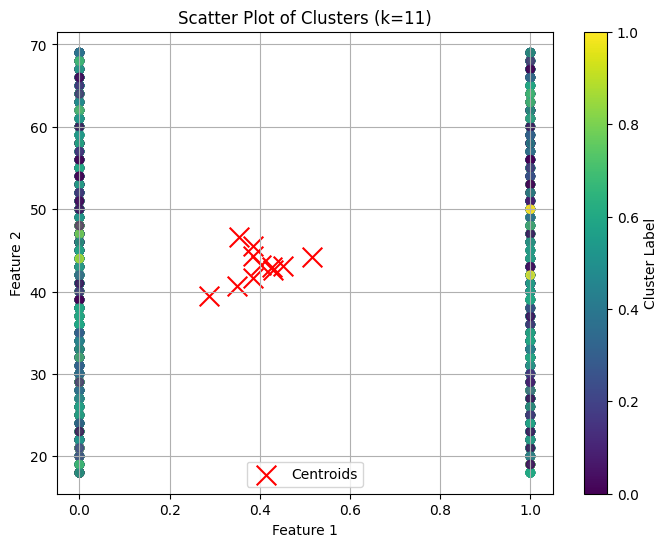

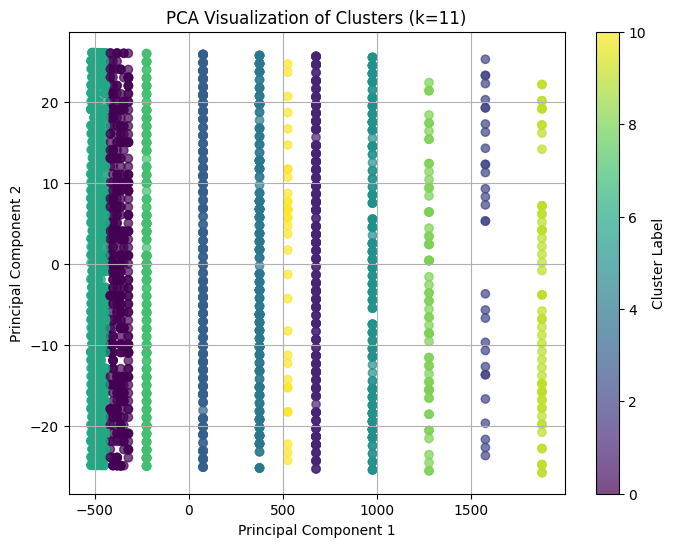

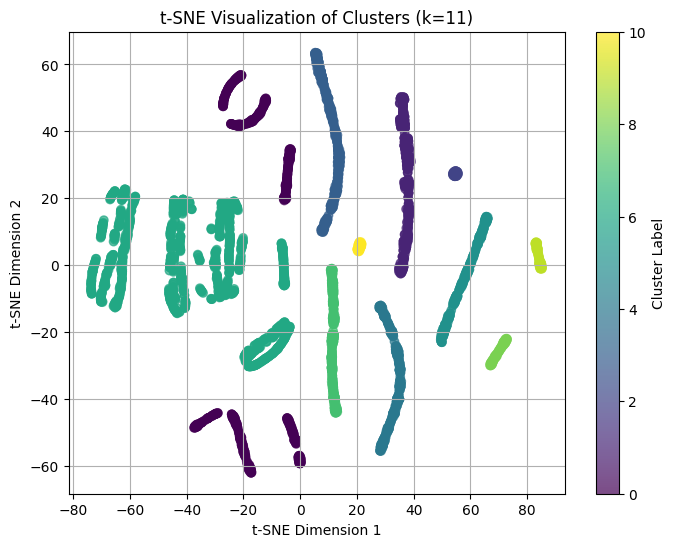

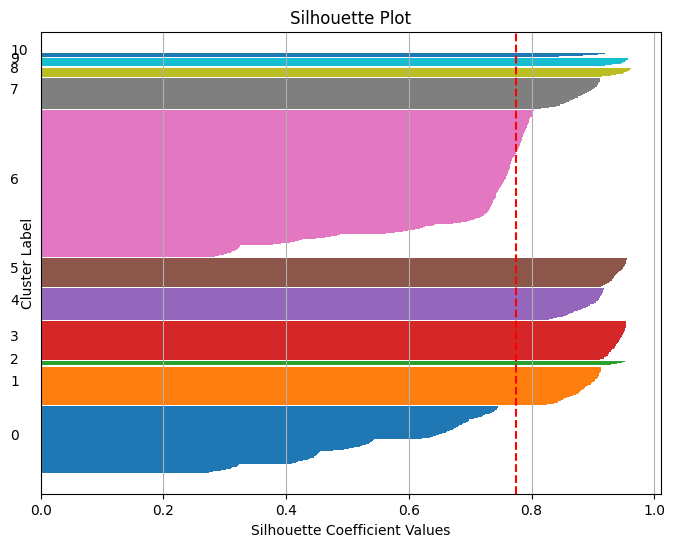

ValueError: Shape of passed values is (11, 5), indices imply (11, 2)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, silhouette_samples
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os

# --- Φόρτωση δεδομένων ---
# Αντικαταστήστε αυτό με τον τρόπο που φορτώνετε τα δεδομένα σας
# π.χ., από CSV: numeric_data = pd.read_csv("data.csv")
# numeric_data = pd.read_csv("data.csv")  # Υποθέτουμε ότι το αρχείο έχει στήλες "Feature1" και "Feature2"

# --- Εύρεση του βέλτιστου αριθμού clusters ---
k_values = range(2, 16)
metrics = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(numeric_data)
    wcss = kmeans.inertia_
    silhouette = silhouette_score(numeric_data, labels)
    calinski_harabasz = calinski_harabasz_score(numeric_data, labels)
    davies_bouldin = davies_bouldin_score(numeric_data, labels)
    metrics.append({"k": k, "WCSS": wcss, "Silhouette Score": silhouette, "Calinski-Harabasz Index": calinski_harabasz, "Davies-Bouldin Index": davies_bouldin})

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# --- Αποθήκευση των μετρικών σε αρχείο Excel ---
output_file = "clustering_metrics.xlsx"
if os.path.exists(output_file):
    # Αν το αρχείο υπάρχει, φόρτωσε το και προσάρτησε τα νέα δεδομένα
    existing_data = pd.read_excel(output_file)
    combined_data = pd.concat([existing_data, metrics_df], ignore_index=True)
    combined_data.to_excel(output_file, index=False)
else:
    # Αν το αρχείο δεν υπάρχει, δημιούργησε το
    metrics_df.to_excel(output_file, index=False)

print(f"Τα αποτελέσματα αποθηκεύτηκαν στο αρχείο: {output_file}")

# --- Οπτικοποίηση του WCSS (Elbow Method) ---
plt.figure(figsize=(8, 5))
plt.plot(metrics_df["k"], metrics_df["WCSS"], marker='o')
plt.title("WCSS vs. Number of Clusters (Elbow Method)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

best_k = metrics_df.loc[metrics_df['Silhouette Score'].idxmax(), 'k']
print(f"\nΒέλτιστος αριθμός clusters: {best_k}")

# --- Εφαρμογή K-Means με τον καλύτερο αριθμό clusters ---
kmeans = KMeans(n_clusters=int(best_k), random_state=42, n_init=10)
final_labels = kmeans.fit_predict(numeric_data)

silhouette = silhouette_score(numeric_data, final_labels)
calinski_harabasz = calinski_harabasz_score(numeric_data, final_labels)
davies_bouldin = davies_bouldin_score(numeric_data, final_labels)

print("\nΜετρικές για τον βέλτιστο αριθμό clusters:")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")

# --- Οπτικοποιήσεις ---
# Scatter Plot (αρχικά χαρακτηριστικά)
plt.figure(figsize=(8, 6))
plt.scatter(numeric_data.iloc[:, 0], numeric_data.iloc[:, 1], c=final_labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title(f"Scatter Plot of Clusters (k={best_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()

# PCA Visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(numeric_data)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=final_labels, cmap='viridis', alpha=0.7)
plt.title(f"PCA Visualization of Clusters (k={best_k})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_data = tsne.fit_transform(numeric_data)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=final_labels, cmap='viridis', alpha=0.7)
plt.title(f"t-SNE Visualization of Clusters (k={best_k})")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()

# Silhouette Plot
silhouette_vals = silhouette_samples(numeric_data, final_labels)
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(int(best_k)):
    cluster_silhouette_vals = silhouette_vals[final_labels == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower = y_upper + 10
plt.axvline(x=silhouette, color="red", linestyle="--")
plt.title("Silhouette Plot")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.yticks([])
plt.grid(True)
plt.show()

# Heatmap of Cluster Centroids
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=["Feature1", "Feature2"])
plt.figure(figsize=(8, 6))
sns.heatmap(centroids_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Cluster Centroids")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.show()

# Pairwise Feature Plots
sns.pairplot(numeric_data.assign(Cluster=final_labels), hue="Cluster", palette="viridis")
plt.suptitle("Pairwise Feature Plots", y=1.02)
plt.show()

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(numeric_data.iloc[:, 0], numeric_data.iloc[:, 1], numeric_data.iloc[:, 1], c=final_labels, cmap='viridis', alpha=0.7)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
ax.set_title(f"3D Scatter Plot of Clusters (k={best_k})")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 2")
plt.legend()
plt.show()


In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- Δημιουργία δεδομένων ---
data, labels_true = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)
numeric_data = pd.DataFrame(data, columns=["Feature1", "Feature2"])

# --- Κανονικοποίηση δεδομένων ---
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# --- Υπολογισμός Dunn Index ---
def calculate_dunn_index(data, labels):
    unique_labels = np.unique(labels)
    inter_cluster_distances = []
    intra_cluster_diameters = []

    for i in unique_labels:
        cluster_points = data[labels == i]
        if len(cluster_points) > 1:
            intra_cluster_diameters.append(np.max(cdist(cluster_points, cluster_points)))
        else:
            intra_cluster_diameters.append(0)

        for j in unique_labels:
            if i != j:
                other_cluster_points = data[labels == j]
                inter_cluster_distances.append(np.min(cdist(cluster_points, other_cluster_points)))

    if inter_cluster_distances and intra_cluster_diameters:
        return np.min(inter_cluster_distances) / np.max(intra_cluster_diameters)
    else:
        return 0

# --- Επιλογή τιμής preference ---
preference_value = np.percentile(numeric_data_scaled, 10)

# --- Εφαρμογή Affinity Propagation ---
aff_prop = AffinityPropagation(preference=preference_value, damping=0.85, random_state=42)
labels = aff_prop.fit_predict(numeric_data_scaled)

# --- Υπολογισμός μετρικών ---
silhouette = silhouette_score(numeric_data_scaled, labels) if len(np.unique(labels)) > 1 else float('nan')
calinski_harabasz = calinski_harabasz_score(numeric_data_scaled, labels) if len(np.unique(labels)) > 1 else float('nan')
davies_bouldin = davies_bouldin_score(numeric_data_scaled, labels) if len(np.unique(labels)) > 1 else float('nan')

# Υπολογισμός WCSS
wcss = 0
for cluster in np.unique(labels):
    cluster_points = numeric_data_scaled[labels == cluster]
    if len(cluster_points) > 0:
        cluster_center = cluster_points.mean(axis=0)
        wcss += np.sum((cluster_points - cluster_center) ** 2)

# Υπολογισμός Dunn Index
dunn = calculate_dunn_index(numeric_data_scaled, labels)

# --- Εκτύπωση μετρικών ---
print(f"Silhouette Score: {silhouette:.4f}" if not np.isnan(silhouette) else "Silhouette Score: Not applicable")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}" if not np.isnan(calinski_harabasz) else "Calinski-Harabasz Index: Not applicable")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}" if not np.isnan(davies_bouldin) else "Davies-Bouldin Index: Not applicable")
print(f"WCSS: {wcss:.4f}")
print(f"Dunn Index: {dunn:.4f}")

# --- Οπτικοποιήσεις ---
# Scatter Plot (αρχικά χαρακτηριστικά)
plt.figure(figsize=(8, 6))
plt.scatter(numeric_data["Feature1"], numeric_data["Feature2"], c=labels, cmap='viridis', alpha=0.7)

# Τα κέντρα των clusters μέσω των exemplars
cluster_centers = numeric_data.iloc[aff_prop.cluster_centers_indices_]
plt.scatter(cluster_centers["Feature1"], cluster_centers["Feature2"], c='red', marker='x', s=200, label='Centroids')

plt.title("Scatter Plot of Affinity Propagation Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()

# PCA Visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(numeric_data_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title("PCA Visualization of Affinity Propagation Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_data = tsne.fit_transform(numeric_data_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title("t-SNE Visualization of Affinity Propagation Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()

# Silhouette Plot
silhouette_vals = silhouette_samples(numeric_data_scaled, labels)
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(len(np.unique(labels))):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower = y_upper + 10
plt.axvline(x=silhouette, color="red", linestyle="--")
plt.title("Silhouette Plot")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.yticks([])
plt.grid(True)
plt.show()

# Heatmap of Cluster Centroids
centroids_df = pd.DataFrame(cluster_centers, columns=["Feature1", "Feature2"])
plt.figure(figsize=(8, 6))
sns.heatmap(centroids_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Cluster Centroids")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.show()

# Pairwise Feature Plots
sns.pairplot(numeric_data.assign(Cluster=labels), hue="Cluster", palette="viridis")
plt.suptitle("Pairwise Feature Plots", y=1.02)
plt.show()

# 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 1], c=labels, cmap='viridis', alpha=0.7)
ax.scatter(cluster_centers["Feature1"], cluster_centers["Feature2"], cluster_centers["Feature2"], c='red', marker='x', s=200, label='Centroids')
ax.set_title("3D Scatter Plot of Affinity Propagation Clusters")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 2")
plt.legend()
plt.show()


In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist
import numpy as np



# Υποθέτουμε ότι το 'numeric_data' περιέχει μόνο αριθμητικά δεδομένα για clustering
# Υπολογισμός του bandwidth για τον Mean Shift
bandwidth = estimate_bandwidth(numeric_data, quantile=0.2, n_samples=500)
print(f"Υπολογισμένο bandwidth: {bandwidth}")

# Εφαρμογή του Mean Shift
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
labels = mean_shift.fit_predict(numeric_data)

# Υπολογισμός αριθμού clusters
n_clusters = len(np.unique(labels))
print(f"Αριθμός Clusters που βρέθηκαν: {n_clusters}")

# Υπολογισμός μετρικών
silhouette = silhouette_score(numeric_data, labels)
calinski_harabasz = calinski_harabasz_score(numeric_data, labels)
davies_bouldin = davies_bouldin_score(numeric_data, labels)

# Dunn Index
cluster_centers = mean_shift.cluster_centers_
cluster_distances = cdist(cluster_centers, cluster_centers)
np.fill_diagonal(cluster_distances, np.inf)
inter_cluster_distance = cluster_distances.min()
intra_cluster_distance = max(
    [np.max(cdist(numeric_data[labels == cluster], [cluster_centers[cluster]]))
     for cluster in range(n_clusters)]
)
dunn_index = inter_cluster_distance / intra_cluster_distance if intra_cluster_distance > 0 else 0

# Υπολογισμός WCSS
wcss = sum(
    np.sum((numeric_data[labels == cluster].values - cluster_centers[cluster]) ** 2)
    for cluster in range(n_clusters)
)

# Εμφάνιση αποτελεσμάτων
print("\nΑποτελέσματα Mean Shift:")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")
print(f"Dunn Index: {dunn_index:.3f}")
print(f"WCSS: {wcss:.3f}")

# Οπτικοποίηση των clusters (αν έχεις 2 χαρακτηριστικά για απεικόνιση)
import matplotlib.pyplot as plt

if numeric_data.shape[1] == 2:
    plt.scatter(numeric_data.iloc[:, 0], numeric_data.iloc[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.6)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x')  # Κέντρα των clusters
    plt.title("Mean Shift Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
else:
    print("Η οπτικοποίηση απαιτεί μόνο 2 χαρακτηριστικά στο dataset.")


Υπολογισμένο bandwidth: 212.41383338966867
Αριθμός Clusters που βρέθηκαν: 6

Αποτελέσματα Mean Shift:
Silhouette Score: 0.739
Calinski-Harabasz Index: 21396.165
Davies-Bouldin Index: 0.323
Dunn Index: 1.000
WCSS: 34660845.365
Η οπτικοποίηση απαιτεί μόνο 2 χαρακτηριστικά στο dataset.


    k  Silhouette Score  Calinski-Harabasz Index  Davies-Bouldin Index  \
0   2         -0.084830                50.480791              2.251452   
1   3          0.003283                97.539143              4.235186   
2   4         -0.065673                95.875368              4.018061   
3   5         -0.077990               115.667859              2.378857   
4   6         -0.147447                75.915801              3.399242   
5   7         -0.039255               103.410113              4.390150   
6   8         -0.161461                63.306504              4.224897   
7   9         -0.116856               129.547501              2.024960   
8  10         -0.085844               157.999936              2.364905   

   Dunn Index          WCSS  
0    0.361117  14901.570975  
1    0.236675  14232.754742  
2    0.226486  13834.964652  
3    0.346278  13140.214284  
4    0.184970  13460.419139  
5    0.153063  12570.040975  
6    0.128775  13212.518688  
7    0.309905  1128

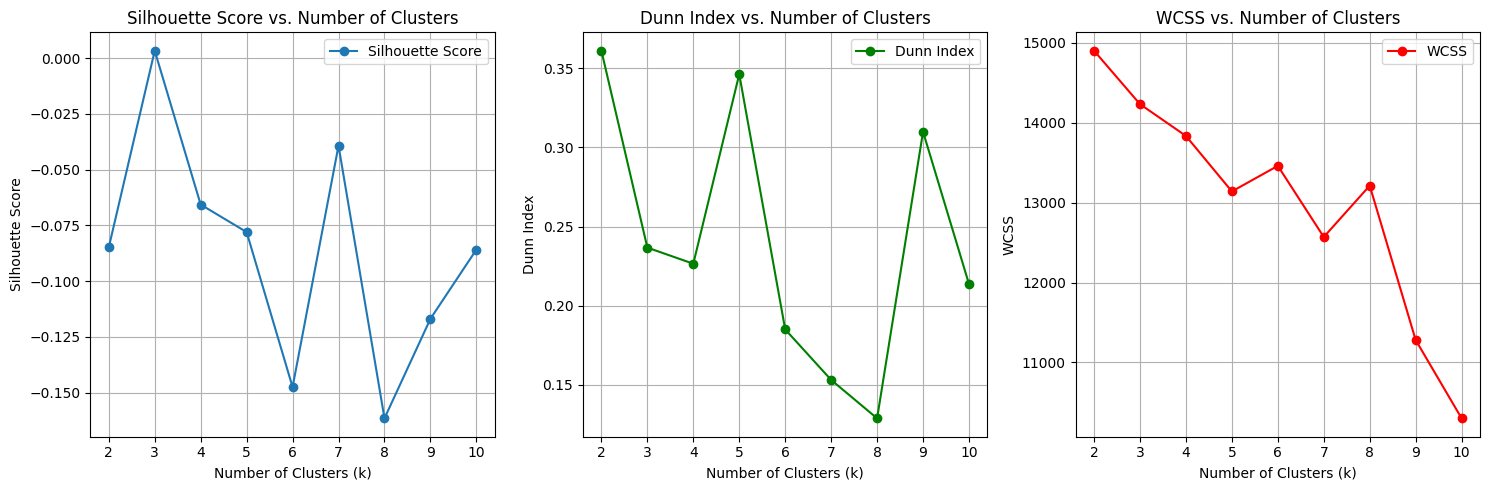

Προτεινόμενος αριθμός clusters: 3


In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

# Καταστολή warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Κανονικοποίηση των δεδομένων
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Αριθμός clusters που θέλουμε να δοκιμάσουμε
k_values = range(2, 11)  # Εξετάζουμε αριθμό clusters από 2 έως 10
metrics = []

for k in k_values:
    try:
        # Εφαρμογή Spectral Clustering
        spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42, n_neighbors=15)
        labels = spectral.fit_predict(numeric_data_scaled)

        # Υπολογισμός μετρικών
        silhouette = silhouette_score(numeric_data_scaled, labels)
        calinski_harabasz = calinski_harabasz_score(numeric_data_scaled, labels)
        davies_bouldin = davies_bouldin_score(numeric_data_scaled, labels)

        # Υπολογισμός WCSS
        wcss = sum(
            np.sum((numeric_data_scaled[labels == cluster] -
                    np.mean(numeric_data_scaled[labels == cluster], axis=0)) ** 2)
            for cluster in np.unique(labels)
        )

        # Dunn Index
        cluster_centers = np.array([
            numeric_data_scaled[labels == cluster].mean(axis=0) for cluster in np.unique(labels)
        ])
        cluster_distances = cdist(cluster_centers, cluster_centers)
        np.fill_diagonal(cluster_distances, np.inf)
        inter_cluster_distance = cluster_distances.min()
        intra_cluster_distance = max(
            [np.max(cdist(numeric_data_scaled[labels == cluster], [cluster_centers[cluster]]))
             for cluster in range(k)]
        )
        dunn_index = inter_cluster_distance / intra_cluster_distance if intra_cluster_distance > 0 else 0

        # Αποθήκευση μετρικών
        metrics.append({
            "k": k,
            "Silhouette Score": silhouette,
            "Calinski-Harabasz Index": calinski_harabasz,
            "Davies-Bouldin Index": davies_bouldin,
            "Dunn Index": dunn_index,
            "WCSS": wcss
        })
    except Exception as e:
        print(f"Σφάλμα στον αριθμό clusters k={k}: {e}")
        metrics.append({
            "k": k,
            "Silhouette Score": np.nan,
            "Calinski-Harabasz Index": np.nan,
            "Davies-Bouldin Index": np.nan,
            "Dunn Index": np.nan,
            "WCSS": np.nan
        })

# Μετατροπή σε DataFrame για καλύτερη εμφάνιση
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Οπτικοποίηση Silhouette Score, Dunn Index και WCSS
plt.figure(figsize=(15, 5))

# Silhouette Score
plt.subplot(1, 3, 1)
plt.plot(metrics_df["k"], metrics_df["Silhouette Score"], marker='o', label='Silhouette Score')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.legend()

# Dunn Index
plt.subplot(1, 3, 2)
plt.plot(metrics_df["k"], metrics_df["Dunn Index"], marker='o', label='Dunn Index', color='green')
plt.title("Dunn Index vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Dunn Index")
plt.grid(True)
plt.legend()

# WCSS
plt.subplot(1, 3, 3)
plt.plot(metrics_df["k"], metrics_df["WCSS"], marker='o', label='WCSS', color='red')
plt.title("WCSS vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Προτείνουμε το βέλτιστο k βάσει του Silhouette Score
if not metrics_df["Silhouette Score"].isnull().all():
    best_k = metrics_df.loc[metrics_df['Silhouette Score'].idxmax(), 'k']
    print(f"Προτεινόμενος αριθμός clusters: {best_k}")
else:
    print("Δεν βρέθηκε κατάλληλος αριθμός clusters βάσει του Silhouette Score.")


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_dunn_index(data, labels):
    """
    Υπολογισμός του Dunn Index για δεδομένα clustering.
    """
    unique_labels = np.unique(labels)
    inter_cluster_distances = []
    intra_cluster_diameters = []

    for i in unique_labels:
        cluster_points = data[labels == i]
        if len(cluster_points) > 1:
            intra_cluster_diameters.append(np.max(cdist(cluster_points, cluster_points)))
        else:
            intra_cluster_diameters.append(0)

        for j in unique_labels:
            if i != j:
                other_cluster_points = data[labels == j]
                inter_cluster_distances.append(np.min(cdist(cluster_points, other_cluster_points)))

    if inter_cluster_distances and intra_cluster_diameters:
        return np.min(inter_cluster_distances) / np.max(intra_cluster_diameters)
    else:
        return 0

# --- Έλεγχος για τα δεδομένα ---
# Χρησιμοποιούμε το subset ως βάση για clustering
if 'subset' not in globals():
    raise ValueError("Τα δεδομένα 'subset' δεν βρέθηκαν. Παρακαλώ βεβαιωθείτε ότι είναι φορτωμένα σωστά.")

# Βεβαιώνουμε ότι περιλαμβάνει μόνο αριθμητικά δεδομένα
numeric_data = subset.select_dtypes(include=[np.number])

# Μετατροπή των δεδομένων σε numpy array για υπολογισμούς
numeric_data_array = numeric_data.to_numpy()

# Προσδιορισμός αριθμού clusters που θέλουμε να δοκιμάσουμε
k_values = range(2, 16)
metrics = []

for k in k_values:
    # Εφαρμογή Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agg_clustering.fit_predict(numeric_data_array)

    # Υπολογισμός μετρικών
    silhouette = silhouette_score(numeric_data_array, labels)
    calinski_harabasz = calinski_harabasz_score(numeric_data_array, labels)
    davies_bouldin = davies_bouldin_score(numeric_data_array, labels)

    # Υπολογισμός WCSS
    wcss = 0
    for cluster in np.unique(labels):
        cluster_points = numeric_data_array[labels == cluster]
        if len(cluster_points) > 0:  # Εξασφαλίζουμε ότι το cluster δεν είναι κενό
            cluster_center = cluster_points.mean(axis=0)
            wcss += np.sum((cluster_points - cluster_center) ** 2)

    # Υπολογισμός Dunn Index
    dunn = calculate_dunn_index(numeric_data_array, labels)

    # Αποθήκευση μετρικών
    metrics.append({
        "k": k,
        "Silhouette Score": silhouette,
        "Calinski-Harabasz Index": calinski_harabasz,
        "Davies-Bouldin Index": davies_bouldin,
        "WCSS": wcss,
        "Dunn Index": dunn
    })

# Μετατροπή σε DataFrame για καλύτερη εμφάνιση
metrics_df = pd.DataFrame(metrics)

# Εκτύπωση μετρικών
print(metrics_df)

# Οπτικοποίηση Silhouette Score, WCSS και Dunn Index
plt.figure(figsize=(15, 5))

# Silhouette Score
plt.subplot(1, 3, 1)
plt.plot(metrics_df["k"], metrics_df["Silhouette Score"], marker='o', label='Silhouette Score')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.legend()

# Dunn Index
plt.subplot(1, 3, 2)
plt.plot(metrics_df["k"], metrics_df["Dunn Index"], marker='o', label='Dunn Index', color='green')
plt.title("Dunn Index vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Dunn Index")
plt.grid(True)
plt.legend()

# WCSS
plt.subplot(1, 3, 3)
plt.plot(metrics_df["k"], metrics_df["WCSS"], marker='o', label='WCSS', color='red')
plt.title("WCSS vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Επιλογή του βέλτιστου αριθμού clusters βάσει του Silhouette Score
best_k = metrics_df.loc[metrics_df['Silhouette Score'].idxmax(), 'k']
print(f"Βέλτιστος αριθμός clusters: {best_k}")

# Τελική εφαρμογή Agglomerative Clustering με τον βέλτιστο αριθμό clusters
agg_clustering = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
final_labels = agg_clustering.fit_predict(numeric_data_array)

# Προσθήκη των ετικετών στα δεδομένα
subset['Agglomerative_Cluster'] = final_labels

# Αποθήκευση των δεδομένων με τα clusters
subset.to_csv('agglomerative_clustered_data.csv', index=False)
print("Τα δεδομένα με τα clusters αποθηκεύτηκαν ως 'agglomerative_clustered_data.csv'.")


In [ ]:
!pip install kneed

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# Υποθέτουμε ότι το numeric_data είναι NumPy array.
# Αν όχι, μετατροπή σε NumPy array.
if not isinstance(numeric_data, np.ndarray):
    numeric_data = numeric_data.to_numpy()

# Εύρεση των κοντινότερων γειτόνων
nearest_neighbors = NearestNeighbors(n_neighbors=15)
neighbors = nearest_neighbors.fit(numeric_data)
distances, indices = neighbors.kneighbors(numeric_data)

# Ταξινόμηση αποστάσεων για εύρεση "elbow point"
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("Εύρεση του Epsilon (ε)")
plt.xlabel("Δείγματα")
plt.ylabel("Απόσταση στον 15ο κοντινότερο γείτονα")
plt.grid(True)
plt.show()

# Αυτόματη εύρεση τιμής epsilon (ε) με KneeLocator
knee_locator = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
epsilon = distances[knee_locator.knee]
print(f"Προτεινόμενη τιμή epsilon (ε): {epsilon:.4f}")

# Ορισμός min_samples
min_samples = 10

# Εφαρμογή DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(numeric_data)

# Εξαγωγή αριθμού clusters
unique_labels = np.unique(labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
print(f"Αριθμός clusters που βρέθηκαν: {n_clusters}")
print(f"Αριθμός outliers: {sum(labels == -1)}")

# Υπολογισμός μετρικών αν υπάρχουν περισσότερα από 1 clusters
if n_clusters > 1:
    silhouette = silhouette_score(numeric_data, labels)
    calinski_harabasz = calinski_harabasz_score(numeric_data, labels)
    davies_bouldin = davies_bouldin_score(numeric_data, labels)

    # Υπολογισμός WCSS
    wcss = 0
    for cluster in unique_labels:
        if cluster != -1:  # Αγνόηση των outliers
            cluster_points = numeric_data[labels == cluster]
            cluster_center = cluster_points.mean(axis=0)
            wcss += np.sum((cluster_points - cluster_center) ** 2)

    # Υπολογισμός Dunn Index
    cluster_centers = np.array([
        numeric_data[labels == cluster].mean(axis=0) for cluster in unique_labels if cluster != -1
    ])
    cluster_distances = cdist(cluster_centers, cluster_centers)
    np.fill_diagonal(cluster_distances, np.inf)
    inter_cluster_distance = cluster_distances.min()
    intra_cluster_distance = max(
        np.max(cdist(numeric_data[labels == cluster], [cluster_centers[idx]]))
        for idx, cluster in enumerate(unique_labels) if cluster != -1
    )
    dunn_index = inter_cluster_distance / intra_cluster_distance if intra_cluster_distance > 0 else 0

    # Εκτύπωση αποτελεσμάτων
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
    print(f"WCSS: {wcss:.4f}")
    print(f"Dunn Index: {dunn_index:.4f}")
else:
    print("Δεν βρέθηκαν αρκετά clusters για τον υπολογισμό μετρικών.")


In [ ]:
import numpy as np
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist

# Υπολογισμός WCSS (Within-Cluster Sum of Squares)
def calculate_wcss(X, labels):
    clusters = np.unique(labels[labels >= 0])  # Αφαιρούμε τα outliers (-1)
    wcss = 0
    for cluster in clusters:
        cluster_points = X[labels == cluster]
        centroid = np.mean(cluster_points, axis=0)
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

# Υπολογισμός Dunn Index
def calculate_dunn_index(X, labels):
    clusters = np.unique(labels[labels >= 0])  # Αφαιρούμε τα outliers (-1)
    distances = cdist(X, X, metric='euclidean')

    intra_cluster_dists = []
    inter_cluster_dists = []

    for cluster in clusters:
        cluster_points = X[labels == cluster]
        intra_dists = cdist(cluster_points, cluster_points, metric='euclidean')
        intra_cluster_dists.append(np.max(intra_dists) if len(intra_dists) > 1 else 0)

    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            cluster_i = X[labels == clusters[i]]
            cluster_j = X[labels == clusters[j]]
            inter_dists = cdist(cluster_i, cluster_j, metric='euclidean')
            inter_cluster_dists.append(np.min(inter_dists))

    dunn_index = (
        np.min(inter_cluster_dists) / np.max(intra_cluster_dists)
        if intra_cluster_dists and inter_cluster_dists
        else 0
    )
    return dunn_index

# Κανονικοποίηση Δεδομένων
def normalize_data(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Δημιουργία Δεδομένων για Παράδειγμα
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
X = normalize_data(X)

# Εφαρμογή OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
labels = optics.fit_predict(X)

# Υπολογισμός Μετρικών
silhouette = silhouette_score(X[labels >= 0], labels[labels >= 0]) if len(np.unique(labels)) > 1 else -1
calinski_harabasz = calinski_harabasz_score(X[labels >= 0], labels[labels >= 0]) if len(np.unique(labels)) > 1 else -1
davies_bouldin = davies_bouldin_score(X[labels >= 0], labels[labels >= 0]) if len(np.unique(labels)) > 1 else -1
wcss = calculate_wcss(X, labels)
dunn_index = calculate_dunn_index(X, labels)

# Εκτύπωση Αποτελεσμάτων
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"WCSS: {wcss:.4f}")
print(f"Dunn Index: {dunn_index:.4f}")


In [ ]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def calculate_dunn_index(data, labels):
    """
    Υπολογισμός του Dunn Index για δεδομένα clustering.
    """
    unique_labels = np.unique(labels)
    inter_cluster_distances = []
    intra_cluster_diameters = []

    for i in unique_labels:
        cluster_points = data[labels == i]
        if len(cluster_points) > 1:
            intra_cluster_diameters.append(np.max(cdist(cluster_points, cluster_points)))
        else:
            intra_cluster_diameters.append(0)

        for j in unique_labels:
            if i != j:
                other_cluster_points = data[labels == j]
                inter_cluster_distances.append(np.min(cdist(cluster_points, other_cluster_points)))

    if inter_cluster_distances and intra_cluster_diameters:
        return np.min(inter_cluster_distances) / np.max(intra_cluster_diameters)
    else:
        return 0


# Εύρος αριθμού clusters για πειραματισμό
k_values = range(2, 11)
metrics = []

for k in k_values:
    # Εφαρμογή Birch Clustering
    birch = Birch(n_clusters=k, threshold=0.5, branching_factor=50)
    labels = birch.fit_predict(numeric_data)

    # Υπολογισμός μετρικών
    silhouette = silhouette_score(numeric_data, labels)
    calinski_harabasz = calinski_harabasz_score(numeric_data, labels)
    davies_bouldin = davies_bouldin_score(numeric_data, labels)

    # Υπολογισμός WCSS
    wcss = sum(
        np.sum((numeric_data[labels == cluster] - np.mean(numeric_data[labels == cluster], axis=0)) ** 2)
        for cluster in np.unique(labels)
    )

    # Υπολογισμός Dunn Index
    dunn = calculate_dunn_index(numeric_data, labels)

    # Αποθήκευση μετρικών
    metrics.append({
        "k": k,
        "Silhouette Score": silhouette,
        "Calinski-Harabasz Index": calinski_harabasz,
        "Davies-Bouldin Index": davies_bouldin,
        "WCSS": wcss,
        "Dunn Index": dunn
    })

# Μετατροπή σε DataFrame για καλύτερη εμφάνιση
metrics_df = pd.DataFrame(metrics)

# Εκτύπωση μετρικών
print(metrics_df)

# Οπτικοποίηση Silhouette Score, WCSS και Dunn Index
plt.figure(figsize=(15, 5))

# Silhouette Score
plt.subplot(1, 3, 1)
plt.plot(metrics_df["k"], metrics_df["Silhouette Score"], marker='o', label='Silhouette Score')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.legend()

# Dunn Index
plt.subplot(1, 3, 2)
plt.plot(metrics_df["k"], metrics_df["Dunn Index"], marker='o', label='Dunn Index', color='green')
plt.title("Dunn Index vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Dunn Index")
plt.grid(True)
plt.legend()

# WCSS
plt.subplot(1, 3, 3)
plt.plot(metrics_df["k"], metrics_df["WCSS"], marker='o', label='WCSS', color='red')
plt.title("WCSS vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Επιλογή του βέλτιστου αριθμού clusters βάσει του Silhouette Score
best_k = metrics_df.loc[metrics_df['Silhouette Score'].idxmax(), 'k']
print(f"Βέλτιστος αριθμός clusters: {best_k}")

# Τελική εφαρμογή Birch με τον βέλτιστο αριθμό clusters
birch = Birch(n_clusters=best_k, threshold=0.5, branching_factor=50)
final_labels = birch.fit_predict(numeric_data)

# --- Προσθήκη των ετικετών στα δεδομένα ---
if 'remaining_data' in globals() and isinstance(remaining_data, pd.DataFrame):
    if len(remaining_data) == len(numeric_data):
        # Αν τα δεδομένα έχουν ίδιο μήκος, προσθέτουμε τις ετικέτες
        remaining_data['Birch_Cluster'] = final_labels
    elif len(numeric_data) < len(remaining_data):
        # Αν το numeric_data είναι υποσύνολο, προσθέτουμε τις ετικέτες μόνο σε αυτό το υποσύνολο
        indices = numeric_data.index  # Παίρνουμε τα indices του numeric_data
        remaining_data.loc[indices, 'Birch_Cluster'] = final_labels
    else:
        raise ValueError("Το μήκος των δεδομένων (numeric_data) και του remaining_data δεν ταιριάζει.")
else:
    # Αν δεν υπάρχει remaining_data, προσθέτουμε στο numeric_data
    numeric_data['Birch_Cluster'] = final_labels

# --- Αποθήκευση των δεδομένων με τα clusters ---
output_file = 'birch_clustered_data.csv'
if 'remaining_data' in globals() and isinstance(remaining_data, pd.DataFrame):
    remaining_data.to_csv(output_file, index=False)
else:
    numeric_data.to_csv(output_file, index=False)

print(f"Τα δεδομένα με τα clusters αποθηκεύτηκαν ως '{output_file}'.")


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_dunn_index(data, labels):
    """
    Υπολογισμός του Dunn Index για δεδομένα clustering.
    """
    unique_labels = np.unique(labels)
    inter_cluster_distances = []
    intra_cluster_diameters = []

    for i in unique_labels:
        cluster_points = data[labels == i]
        if len(cluster_points) > 1:
            intra_cluster_diameters.append(np.max(cdist(cluster_points, cluster_points)))
        else:
            intra_cluster_diameters.append(0)

        for j in unique_labels:
            if i != j:
                other_cluster_points = data[labels == j]
                inter_cluster_distances.append(np.min(cdist(cluster_points, other_cluster_points)))

    if inter_cluster_distances and intra_cluster_diameters:
        return np.min(inter_cluster_distances) / np.max(intra_cluster_diameters)
    else:
        return 0

# Εύρος αριθμού clusters για πειραματισμό
k_values = range(2, 16)
metrics = []

for k in k_values:
    # Εφαρμογή GMM Clustering
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(numeric_data)
    labels = gmm.predict(numeric_data)

    # Υπολογισμός μετρικών
    silhouette = silhouette_score(numeric_data, labels)
    calinski_harabasz = calinski_harabasz_score(numeric_data, labels)
    davies_bouldin = davies_bouldin_score(numeric_data, labels)

    # Υπολογισμός WCSS
    wcss = sum(
        np.sum((numeric_data[labels == cluster] - np.mean(numeric_data[labels == cluster], axis=0)) ** 2)
        for cluster in np.unique(labels)
    )

    # Υπολογισμός Dunn Index
    dunn = calculate_dunn_index(numeric_data, labels)

    # Αποθήκευση μετρικών
    metrics.append({
        "k": k,
        "Silhouette Score": silhouette,
        "Calinski-Harabasz Index": calinski_harabasz,
        "Davies-Bouldin Index": davies_bouldin,
        "WCSS": wcss,
        "Dunn Index": dunn
    })

# Μετατροπή σε DataFrame για καλύτερη εμφάνιση
metrics_df = pd.DataFrame(metrics)

# Εκτύπωση μετρικών
print(metrics_df)

# Οπτικοποίηση Silhouette Score, WCSS και Dunn Index
plt.figure(figsize=(15, 5))

# Silhouette Score
plt.subplot(1, 3, 1)
plt.plot(metrics_df["k"], metrics_df["Silhouette Score"], marker='o', label='Silhouette Score')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.legend()

# Dunn Index
plt.subplot(1, 3, 2)
plt.plot(metrics_df["k"], metrics_df["Dunn Index"], marker='o', label='Dunn Index', color='green')
plt.title("Dunn Index vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Dunn Index")
plt.grid(True)
plt.legend()

# WCSS
plt.subplot(1, 3, 3)
plt.plot(metrics_df["k"], metrics_df["WCSS"], marker='o', label='WCSS', color='red')
plt.title("WCSS vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Επιλογή του βέλτιστου αριθμού clusters βάσει του Silhouette Score
best_k = metrics_df.loc[metrics_df['Silhouette Score'].idxmax(), 'k']
print(f"Βέλτιστος αριθμός clusters: {best_k}")

# Τελική εφαρμογή GMM με τον βέλτιστο αριθμό clusters
gmm = GaussianMixture(n_components=best_k, random_state=42)
gmm.fit(numeric_data)
final_labels = gmm.predict(numeric_data)

# Προσθήκη των ετικετών στα δεδομένα
remaining_data['GMM_Cluster'] = final_labels

# Αποθήκευση των δεδομένων με τα clusters
remaining_data.to_csv('gmm_clustered_data.csv', index=False)
print("Τα δεδομένα με τα clusters αποθηκεύτηκαν ως 'gmm_clustered_data.csv'.")


In [ ]:
print(remaining_data.describe())


In [ ]:
import matplotlib.pyplot as plt

numeric_columns = remaining_data.select_dtypes(include=["float64", "int64"]).columns
for column in numeric_columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    remaining_data[column].hist(bins=30)
    plt.title(f"Histogram of {column}")
    plt.subplot(1, 2, 2)
    remaining_data.boxplot(column)
    plt.title(f"Boxplot of {column}")
    plt.show()